In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
# Import the cleaned data
df = pd.read_csv('Cleaned_Data.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,head,age,Python,Excel,Matlab,Spark,aws,senior,junior,master
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,...,NY,59,1,0,0,0,1,0,0,0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,...,NY,127,0,1,0,0,0,0,0,1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,...,NY,17,1,1,0,0,0,1,1,1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,...,VA,18,0,0,0,0,1,0,0,0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,...,NY,11,1,1,0,0,0,0,0,0


Text(0.5, 1.0, 'Numbers of Jobs by Profession')

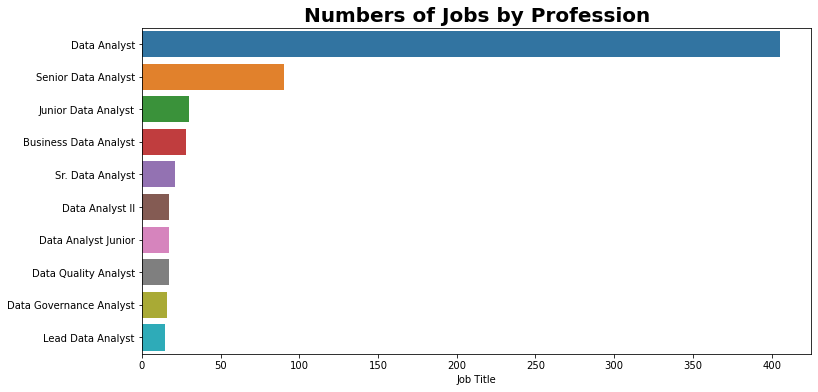

In [121]:
# Plotting by Job title
plt.figure(figsize=(12,6))
sns.barplot(x=df['Job Title'].value_counts()[0:10],y=df['Job Title'].value_counts()[0:10].index)
plt.title('Numbers of Jobs by Profession', weight='bold', fontsize=20)

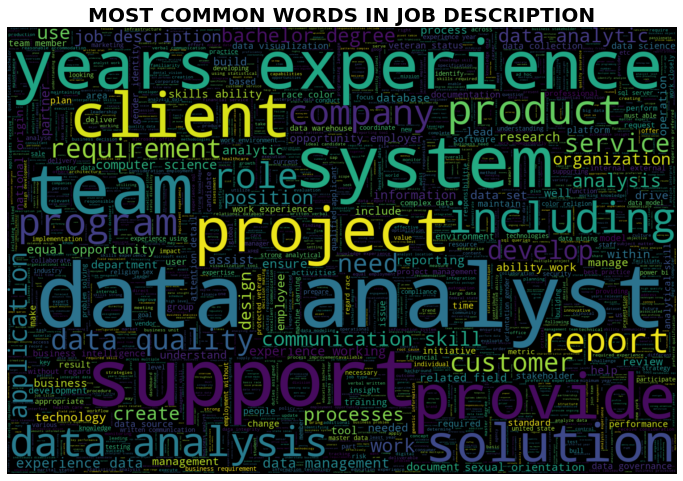

In [28]:
# Most Common Words in the Job Description Column
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """ remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color = 'black', random_state=1, stopwords = STOPWORDS, max_words=2000, width = 1500, height=1000)
wc.generate(text)

plt.figure(figsize=[12,12])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('MOST COMMON WORDS IN JOB DESCRIPTION', weight='bold', fontsize=20)
plt.show()

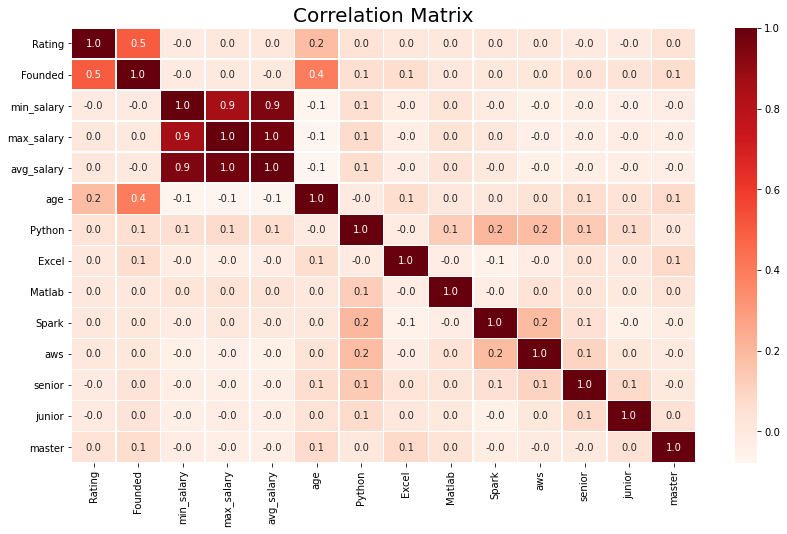

In [33]:
# Correlation matrix between features and the average Salary
plt.figure(figsize=(14,8))
s = sns.heatmap(df.corr(), annot=True, linewidth='.5', fmt='.1f',cmap=plt.cm.Reds)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

Graph for Location: total = 15


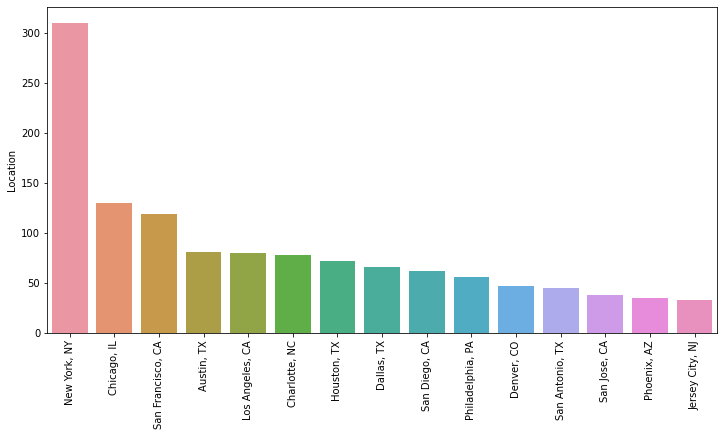

Graph for Headquarters: total = 15


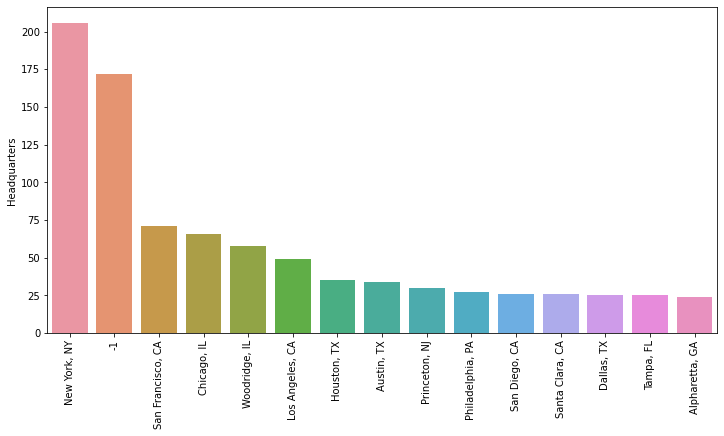

Graph for Company Text: total = 15


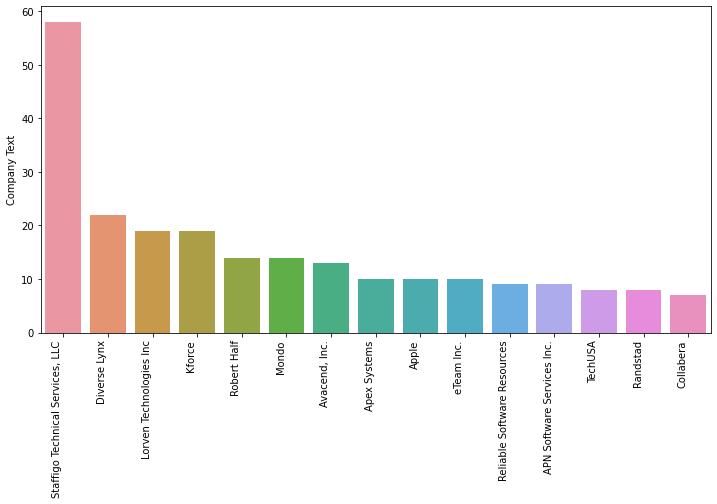

Graph for Size: total = 9


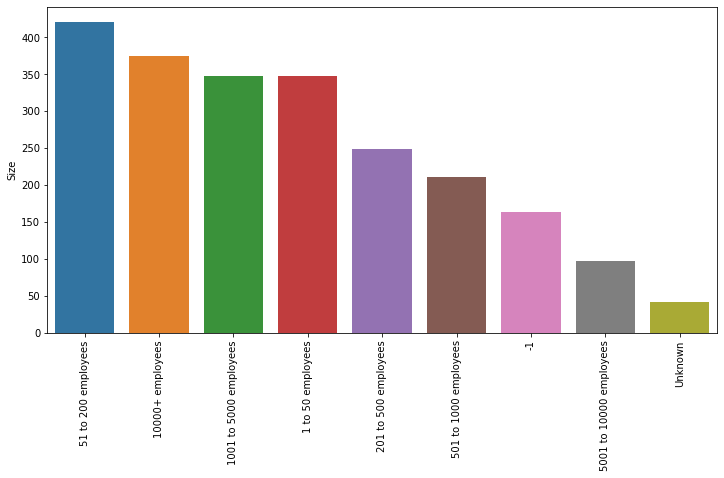

Graph for Type of ownership: total = 15


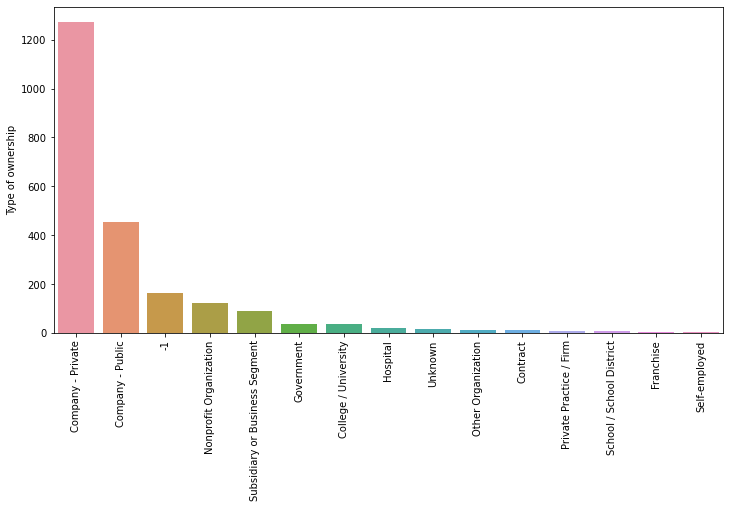

Graph for Industry: total = 15


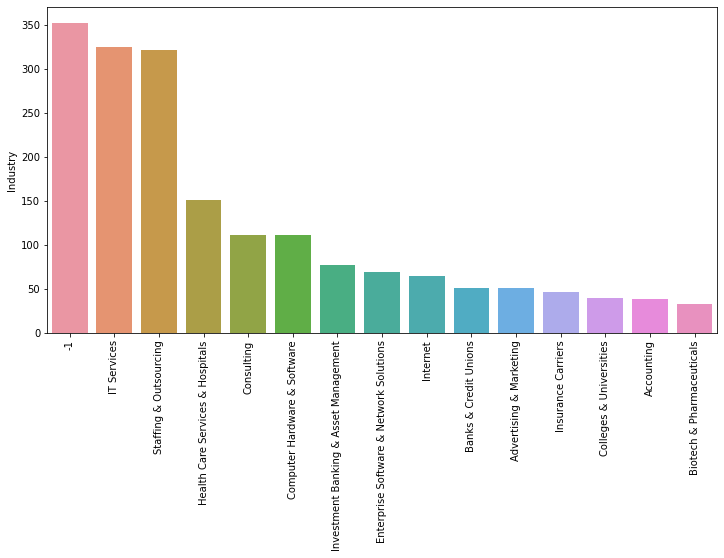

Graph for Sector: total = 15


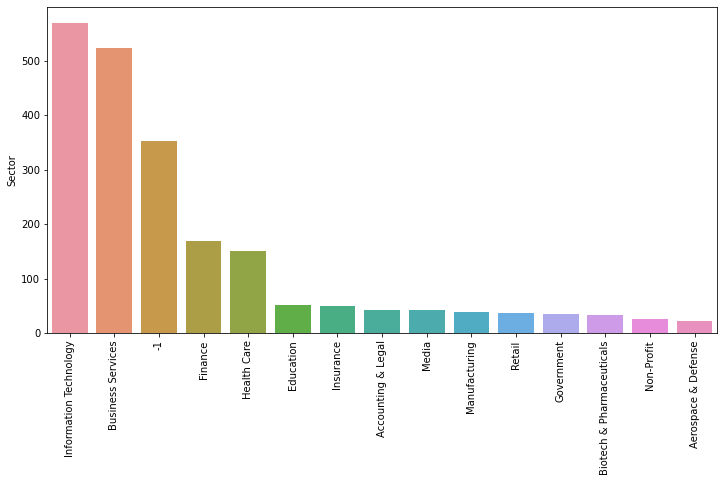

Graph for Revenue: total = 14


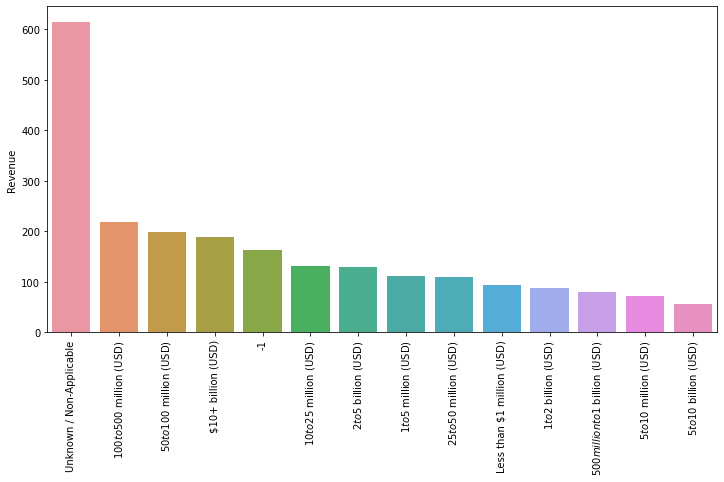

In [39]:
# Plot the top 15 values of each feature
for i in df[['Location','Headquarters','Company Text','Size','Type of ownership','Industry','Sector','Revenue']].columns:
    plt.figure(figsize=(12,6))
    cat_num=df[i].value_counts()[:15]
    print('Graph for %s: total = %d'%(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

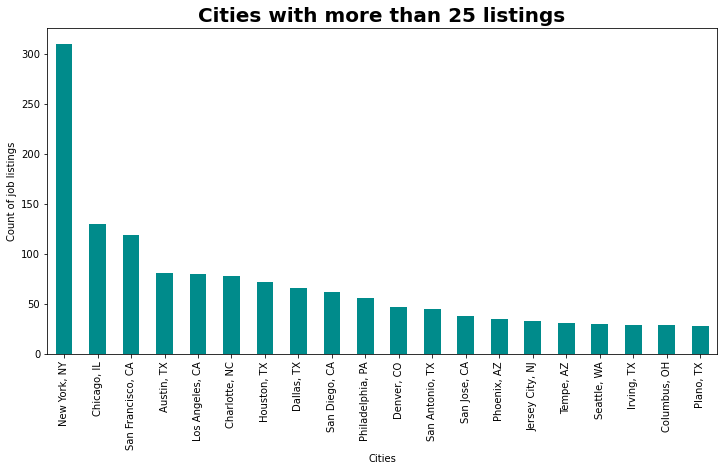

In [58]:
# Plot the number of locations with more than 25 listings
location_count = df.Location.value_counts() >= 25
temp_df = pd.DataFrame(location_count).reset_index()
temp_df.columns = ['Location', '25 Listings']
df = df.merge(temp_df)
plt.figure(figsize=(12,6))
df[df['25 Listings'] == True]['Location'].value_counts().plot(kind='bar', color='darkcyan')
plt.xlabel('Cities')
plt.ylabel('Count of job listings')
plt.title('Cities with more than 25 listings', weight='bold', fontsize=20)
plt.show()

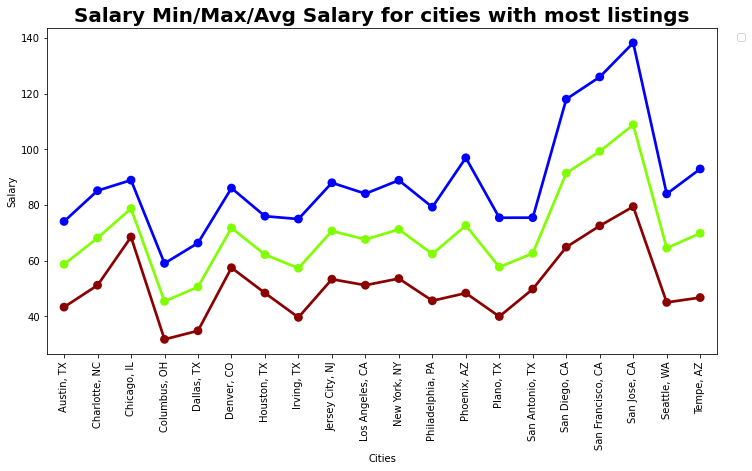

In [119]:
# Plot the variance of the average salary in top 25 states
plt.figure(figsize=(12,6))
df_salary_25 = df[df['25 Listings'] == True]
df_salary_25_group = df_salary_25.groupby('Location').mean()[['min_salary', 'max_salary','avg_salary']]
df_salary_25_group.reset_index(inplace=True)
fig1=sns.pointplot(data=df_salary_25_group, x='Location', y='min_salary', color='darkred')
fig2=sns.pointplot(data=df_salary_25_group, x='Location', y='max_salary', color='blue')
fig3=sns.pointplot(data=df_salary_25_group, x='Location', y='avg_salary', color='chartreuse')
plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.ylabel('Salary')
plt.title('Salary Min/Max/Avg Salary for cities with most listings', weight='bold', fontsize=20)
plt.legend([fig1, fig2, fig3], ['Salary Min','Salary Max','Salary Avg'],bbox_to_anchor=(1.05, 1))
plt.show()

Graph for Python: total = 2


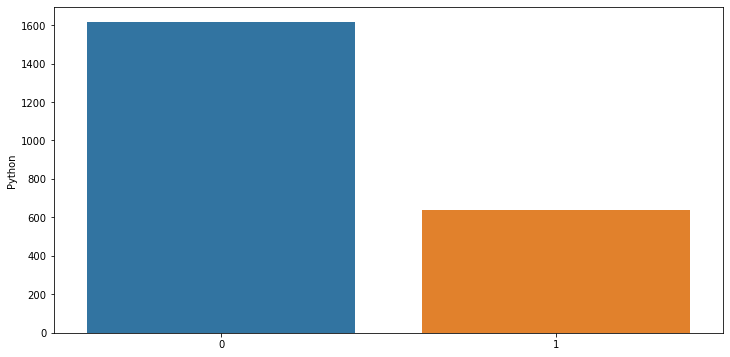

Graph for Excel: total = 2


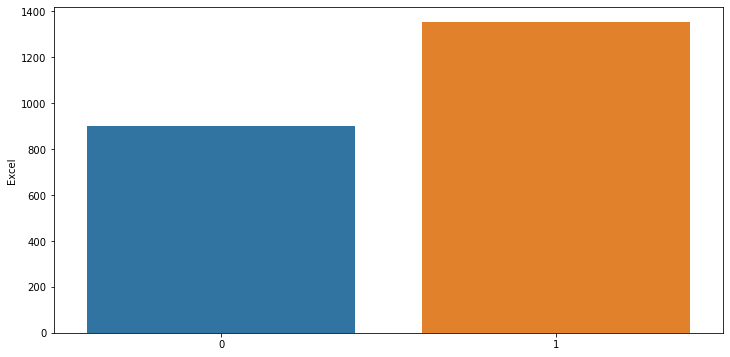

Graph for Matlab: total = 2


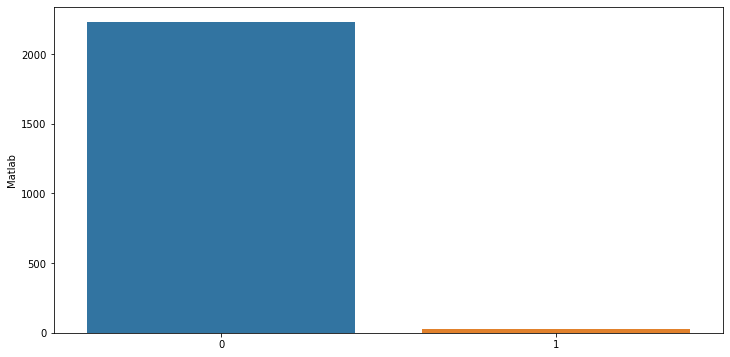

Graph for Spark: total = 2


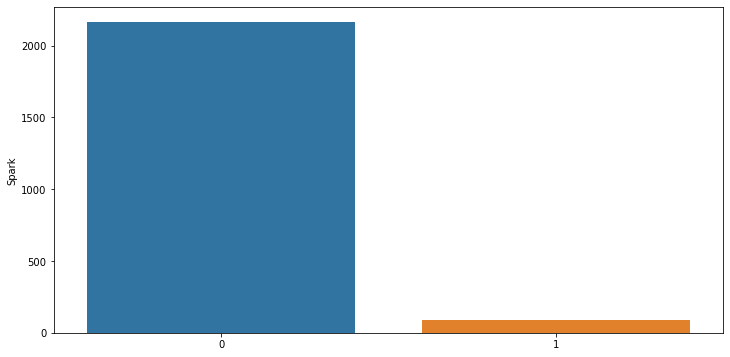

Graph for aws: total = 2


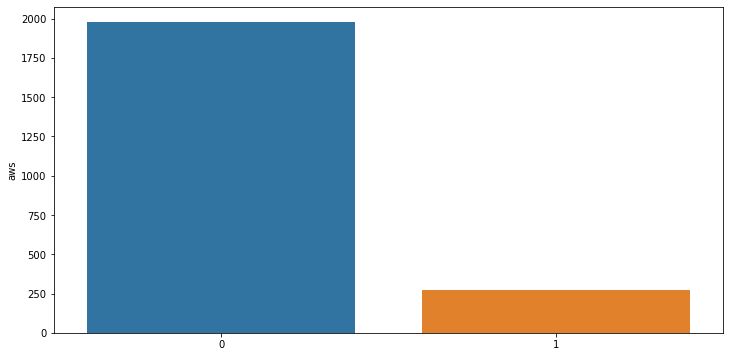

In [90]:
# Plot the number of requirements
for i in df[['Python','Excel','Matlab','Spark','aws']].columns:
    plt.figure(figsize=(12,6))
    cat_num=df[i].value_counts()
    print('Graph for %s: total = %d'%(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels())
    plt.show()

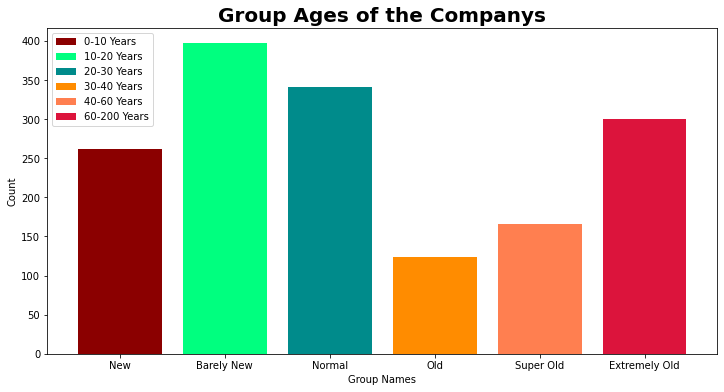

In [114]:
# Create different groups of ages
bins=[0,10,20,30,40,60,300] 
Names=['New','Barely New','Normal','Old','Super Old','Extremely Old']
df['age_ranges'] = pd.cut(df['age'], bins=bins, labels=Names)

# Plot the numer of companys by age group
fig, ax =plt.subplots()
fig.set_size_inches((12,6))
colors=['darkred','springgreen','darkcyan','darkorange','coral','crimson']
nam=['0-10 Years','10-20 Years','20-30 Years','30-40 Years','40-60 Years','60-200 Years']
for i in range(len(Names)):
    plt.bar(Names[i],df['age_ranges'][df['age_ranges']==Names[i]].value_counts(),color=colors[i],label=nam[i])

plt.xlabel('Group Names')
plt.ylabel('Count')
plt.title('Group Ages of the Companys', weight='bold', fontsize=20)
plt.legend()
plt.show()